### brute force O(2^W)
- 모든 경로를 다 탐색해본다

In [1]:
from itertools import product
N = int(input())
W = int(input())
l = [list(map(int,input().split())) for _ in range(W)]

def x(w) :
  a = [1, 1] #경찰차1
  b = [N, N]
  d = 0
  for i, c in enumerate(w) :
    if c == 'a' :
      d += abs(a[0] - l[i][0]) + abs(a[1] - l[i][1])
      a = l[i]
    else :
      d += abs(b[0] - l[i][0]) + abs(b[1] - l[i][1])
      b = l[i]
  print(w, d)

for w in product('ab', repeat=W) :
  x(w)

('a', 'a', 'a') 13
('a', 'a', 'b') 15
('a', 'b', 'a') 11
('a', 'b', 'b') 13
('b', 'a', 'a') 17
('b', 'a', 'b') 15
('b', 'b', 'a') 9
('b', 'b', 'b') 11


### DP O(N^2)
- `DP[A][B]`: 경찰차1이 A번째 사건, 경찰차2가 B번째 사건을 해결했을 때의 최소 거리
- 경로의 선택은 다음과 같이 한다. 다음 경로가 X라고 할 때
  - 경찰차1이 해결하러 간 경우: `경찰차1의 위치를 변경(X, B) + dist(A -> X)`
  - 경찰차2가 해결하러 간 경우: `경찰차2의 위치를 변경(A, X) + dist(B -> X)`

- `DP[A][B]`가 최소거리를 가지고 있을 경우, A와 B사건 이전에 해결한 사건은 최단 경로를 계산하는데에 영향을 주지 않는다.
  - 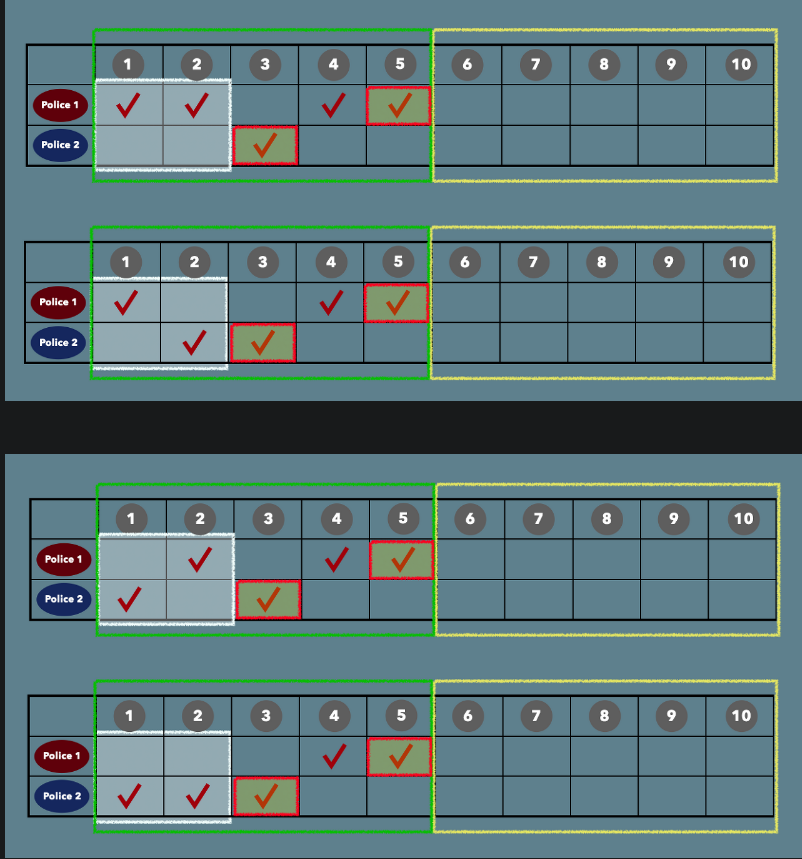


- 최적 경로로가 갱신될 때 마다 `loc`에 어떤 경찰차를 이동했는지 기록한다.

In [ ]:
import sys
sys.setrecursionlimit(10**6)
input=sys.stdin.readline
N = int(input())
W = int(input())
l = [list(map(int,input().split())) for _ in range(W)]

def calc_dist(police, target, start) :
  px, py, tx, ty = 0, 0, 0, 0
  if start == 1 : #police가 1,1에 있다
    px = 1
    py = 1
  elif start == 2 : #police가 N,N에 있다
    px = N
    py = N
  else : #두 경찰차 모두 사건을 1번이상 맡았다.
    px = l[police-1][0]
    py = l[police-1][1]
  
  tx = l[target-1][0]
  ty = l[target-1][1]
  return abs(px-tx) + abs(py-ty)

NONE = -1
store = [[NONE for _ in range(W+1)] for _ in range(W+1)]
loc = [[-1] * (W+1) for _ in range(W+1)]
def find_distance(p1, p2) :
  """두 경찰차가 현재 p1, p2 사건을 마지막으로 맡았을 때 이후로 최소 비용 출력
  find_distance(3,5)는 이제 6번째 사건을 처리할 차례이며,
  경찰차1이 6번 사건을 맡거나 = find_distance(6,5) + 3 -> 6
  경찰차2가 6번 사건을 맡거나 = find_distance(3,6) + 5 -> 6
  
  그리고 어느 경찰차가 이동해야 하는지를 store[p1][p2]에 저장한다.
  """

  if p1 == W or p2 == W : #마지막 사건을 처리했다.
    return 0
  
  move = max(p1, p2) + 1
  if store[p1][p2] != NONE : #이미 계산한 적이 있다.
    return store[p1][p2]

  if p1 == 0 : #경찰차1이 아직 사건을 맡지 않았다.
    tmp1 = find_distance(move, p2) + calc_dist(p1, move, 1)
  else :
    tmp1 = find_distance(move, p2) + calc_dist(p1, move, 0)
  
  if p2 == 0 :
    tmp2 = find_distance(p1, move) + calc_dist(p1, move, 2)
  else :
    tmp2 = find_distance(p1, move) + calc_dist(p2, move, 0)

  store[p1][p2] = min(tmp1, tmp2)
  if tmp1 < tmp2 :
    loc[p1][p2] = 1
  else :
    loc[p1][p2] = 2

  return store[p1][p2]

print(find_distance(0, 0))

#경로 재구성
x, y = 0, 0
answer = []
for i in range(W):
  answer.append(loc[x][y])
  if loc[x][y] == 1 :
    x = i+1
  else :
    y = i+1

sys.stdout.write("\n".join(map(str, answer)))